In [4]:
import numpy as np
from scipy import linalg as la
# Problem 1
def cond(A):
    a = la.svdvals(A)
    n = a[0]/a[-1]
    return n

a = np.array([[1,2], [4, 9]])
print(cond(a))
print(np.linalg.cond(a))

101.990195136
101.990195136


In [128]:
# Problem 2
import sympy as sy
from matplotlib import pyplot as plt
# The roots of w are 1, 2, ..., 20.
w_roots = np.arange(1, 21)
# Get the exact Wilkinson polynomial coefficients using SymPy.
x, i = sy.symbols('x i')
w = sy.poly_from_expr(sy.product(x-i, (i, 1, 20)))[0]
w_coeffs = np.array(w.all_coeffs())
w_roots = np.sort(w_roots)
k = np.zeros(100)
rel = np.zeros(100)

def exper():
    # Perturb one of the coefficients very slightly.
    ite = 1
    while ite < 100:
        h = np.random.normal(1, 1e-10)
        h = np.array(h, dtype='complex')
        new_coeffs = w_coeffs * h
        new_coeffs = np.array(new_coeffs, dtype = 'complex')
    # Use NumPy to compute the roots of the perturbed polynomial.
        new_roots = np.roots(new_coeffs)
        new_roots = np.sort(new_roots)
        plt.scatter(new_roots.real, new_roots.imag, c = 'black', marker = ',', s = 4)
        plt.ylim(-1e-4, 1e-4)
        k[ite] = la.norm(new_roots - w_roots, np.inf) / h
        rel[ite] = k[ite] * la.norm(w_coeffs, np.inf) / la.norm(w_roots, np.inf)
        ite += 1
    plt.scatter(w_roots.real, w_roots.imag, c = 'b', marker = 'o')
    plt.show()
    return np.mean(k), np.mean(rel)

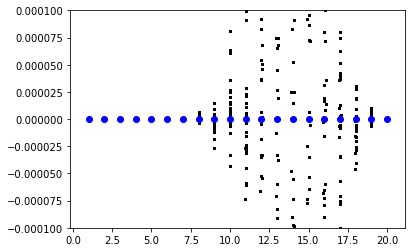

(0.029874375281599148, 20618934958864852.0)

In [129]:
import warnings
warnings.filterwarnings('ignore')
exper()

In [131]:
# Problem 3
def cond_complex(A):
    reals = np.random.normal(0, 1e-10, A.shape)
    imags = np.random.normal(0, 1e-10, A.shape)
    H = reals + 1j*imags
    v = la.eigvals(A)
    v_tilde = la.eigvals(A + H)
    k_hat = la.norm(v - v_tilde)/la.norm(H)
    k = la.norm(A)/la.norm(v) * k_hat
    return k_hat, k

In [ ]:
# Problem 4
def prob4(bound, res):
    